In [1]:
%%capture
%pip install -U 'rockfish[labs]' -f 'https://packages.rockfish.ai'

In [2]:
import rockfish as rf
import rockfish.labs as rl

In [3]:
# download our example of timeseries data: finance.csv
!wget --no-clobber https://docs.rockfish.ai/tutorials/finance.csv
# original source data
og_ts_dataset = rf.Dataset.from_csv("timeseries", "finance.csv")
og_ts_dataset.to_pandas()

File ‘finance.csv’ already there; not retrieving.



,customer,age,gender,merchant,category,amount,fraud,timestamp
0,C1093826151,4,M,M348934600,transportation,4.55,0,2023-01-01
1,C575345520,2,F,M348934600,transportation,76.67,0,2023-01-01
2,C1787537369,2,M,M1823072687,transportation,48.02,0,2023-01-01
3,C1732307957,5,F,M348934600,transportation,55.06,0,2023-01-01
4,C842799656,1,F,M348934600,transportation,25.62,0,2023-01-01
...,...,...,...,...,...,...,...,...
49995,C1971105040,3,M,M348934600,transportation,67.91,0,2023-01-20
49996,C51444479,3,M,M348934600,transportation,32.27,0,2023-01-20
49997,C1096642744,5,M,M1535107174,wellnessandbeauty,149.70,0,2023-01-20
49998,C1166683343,2,F,M1823072687,transportation,24.78,0,2023-01-20


## Evaluate datasets based on specific conditions


#### Example 1: the specified field without null values


In [4]:
# manually create a dataset with missing values
df = og_ts_dataset.to_pandas()
df.loc[:4, "age"] = None  # introduce 5 missing values
null_dataset = rf.Dataset.from_pandas("null_sample", df)
null_dataset.to_pandas()

,customer,age,gender,merchant,category,amount,fraud,timestamp
0,C1093826151,None,M,M348934600,transportation,4.55,0,2023-01-01
1,C575345520,None,F,M348934600,transportation,76.67,0,2023-01-01
2,C1787537369,None,M,M1823072687,transportation,48.02,0,2023-01-01
3,C1732307957,None,F,M348934600,transportation,55.06,0,2023-01-01
4,C842799656,None,F,M348934600,transportation,25.62,0,2023-01-01
...,...,...,...,...,...,...,...,...
49995,C1971105040,3,M,M348934600,transportation,67.91,0,2023-01-20
49996,C51444479,3,M,M348934600,transportation,32.27,0,2023-01-20
49997,C1096642744,5,M,M1535107174,wellnessandbeauty,149.70,0,2023-01-20
49998,C1166683343,2,F,M1823072687,transportation,24.78,0,2023-01-20


In [5]:
query = """SELECT *
    FROM my_table
    WHERE age IS NOT NULL"""
dataset = null_dataset.sync_sql(query)
dataset.to_pandas()

,customer,age,gender,merchant,category,amount,fraud,timestamp
0,C2101882723,1,F,M348934600,transportation,9.18,0,2023-01-01
1,C1799882713,1,F,M1823072687,transportation,16.71,0,2023-01-01
2,C1607867760,4,F,M1823072687,transportation,5.80,0,2023-01-01
3,C1663641926,6,F,M348934600,transportation,22.70,0,2023-01-01
4,C1666444221,3,M,M348934600,transportation,27.27,0,2023-01-01
...,...,...,...,...,...,...,...,...
49990,C1971105040,3,M,M348934600,transportation,67.91,0,2023-01-20
49991,C51444479,3,M,M348934600,transportation,32.27,0,2023-01-20
49992,C1096642744,5,M,M1535107174,wellnessandbeauty,149.70,0,2023-01-20
49993,C1166683343,2,F,M1823072687,transportation,24.78,0,2023-01-20


#### Example 2: Categorical Field Within Specified Categories


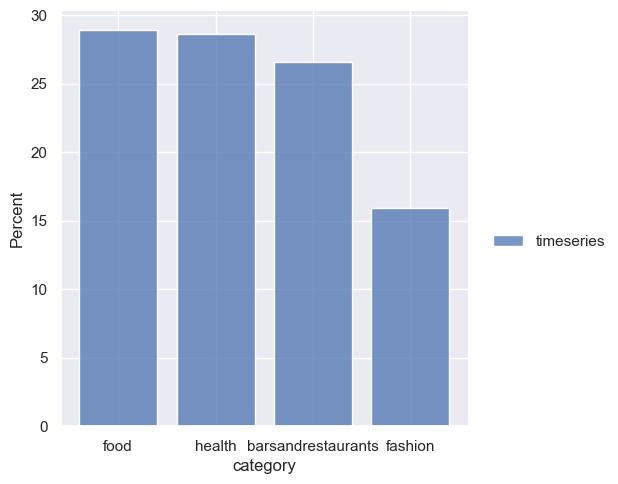

In [6]:
query = """SELECT *
    FROM my_table
    WHERE category IN ('fashion', 'health',
       'barsandrestaurants', 'food')"""

# Argument of datasets should be a list of one or more datasets
rl.vis.custom_plot([og_ts_dataset], query, rl.vis.plot_bar, "category")

#### Example 3: Select the Continuous Numerical Field Within a Specified Range


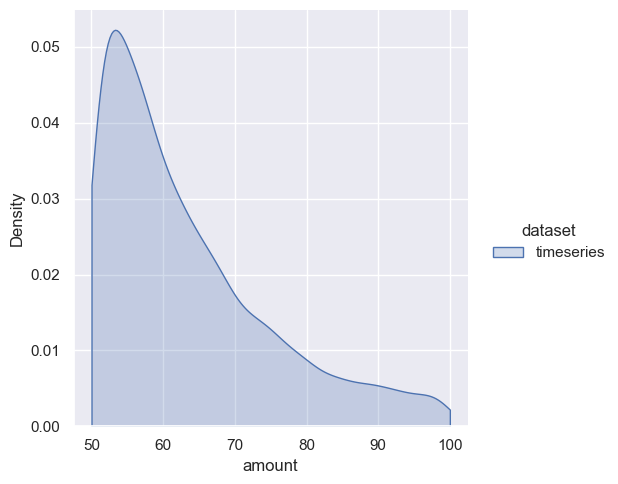

In [7]:
query = """SELECT *
    FROM my_table
    WHERE amount BETWEEN 50 AND 100"""
rl.vis.custom_plot([og_ts_dataset], query, rl.vis.plot_kde, "amount")

### Evaluate datasets based on the aggregated values

#### Example: count the number of unique values

Below is the example to count the number of distinct
"merchant" values and show them in histogram


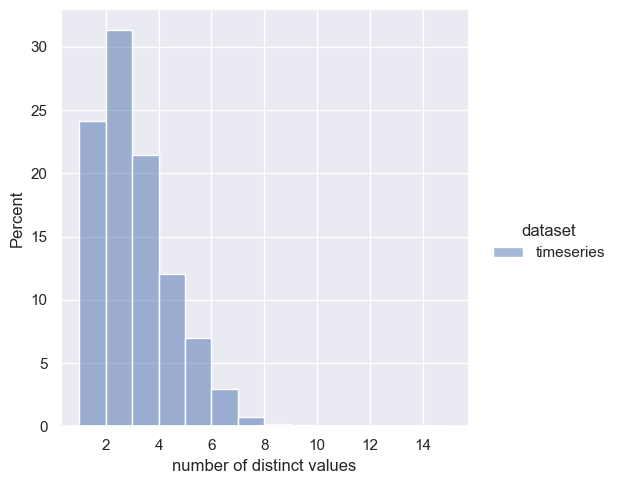

In [8]:
query = """SELECT COUNT(DISTINCT merchant) AS "number of distinct values"
    FROM my_table
    GROUP BY customer, age, gender"""

# Argument of datasets should be a list of one or more datasets
rl.vis.custom_plot(
    [og_ts_dataset],
    query,
    rl.vis.plot_hist,
    "number of distinct values",
    binwidth=1,
)